<a href="https://colab.research.google.com/github/zahidx/Arduino_code/blob/main/Copy_of_Swarm_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import random

# Read the file, skipping any empty lines
word_histograms_list = []

with open('/content/wikipedia_td.txt') as file:
    for line in file:
        stripped_line = line.strip()
        if stripped_line:  # Check if the line is not empty
            word_histograms_list.append(np.fromstring(stripped_line, sep=' '))

# Convert the list to a NumPy array
word_histograms = np.array(word_histograms_list)

# Parameters
num_particles = 30
num_dimensions = word_histograms.shape[1]  # Use the actual number of columns in word_histograms
num_clusters = 10
max_iterations = 100

# PSO Parameters
w = 0.5  # Inertia weight
c1 = 1   # Cognitive (particle) weight
c2 = 2   # Social (swarm) weight

# Initialize particles and velocities
particles = np.random.rand(num_particles, num_dimensions)
velocities = np.random.rand(num_particles, num_dimensions)

# Initialize personal best positions and global best position
p_best_positions = np.copy(particles)
g_best_position = np.copy(particles[np.argmin([np.linalg.norm(p - np.mean(word_histograms, axis=0)) for p in particles])])

# Fitness function
def fitness(position):
    if position.shape != (num_dimensions,):
        raise ValueError(f"Incorrect shape of position: {position.shape}")

    mean_histogram = np.mean(word_histograms, axis=0)
    return np.linalg.norm(position - mean_histogram)

# Update velocity
def update_velocity(particle, velocity, p_best, g_best):
    r1, r2 = random.random(), random.random()
    cognitive_velocity = c1 * r1 * (p_best - particle)
    social_velocity = c2 * r2 * (g_best - particle)
    new_velocity = w * velocity + cognitive_velocity + social_velocity
    return new_velocity

# Update position
def update_position(particle, velocity):
    new_position = particle + velocity
    return new_position

# PSO Algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        current_fitness = fitness(particles[i])

        if fitness(particles[i]) < fitness(p_best_positions[i]):
            p_best_positions[i] = np.copy(particles[i])

        if current_fitness < fitness(g_best_position):
            g_best_position = np.copy(particles[i])

        velocities[i] = update_velocity(particles[i], velocities[i], p_best_positions[i], g_best_position)
        particles[i] = update_position(particles[i], velocities[i])

    print(f"Iteration {iteration+1}/{max_iterations} complete.")

# Output
print("Best Position (Cluster Centers):", g_best_position)


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import random

# Load the titles and dictionary data from the provided CSV files
try:
    titles = pd.read_csv('/content/titles.csv', header=None).values.flatten()
    dictionary = pd.read_csv('/content/dictionary.csv', header=None).values.flatten()
except Exception as e:
    print(f"Error loading CSV files: {e}")
    raise

# Read the word_histograms data, skipping any empty lines
word_histograms_list = []
with open('/content/wikipedia_td.txt', 'r') as file:
    for line in file:
        stripped_line = line.strip()
        if stripped_line:  # Check if the line is not empty
            word_histograms_list.append(np.fromstring(stripped_line, sep=' '))

# Convert the list to a NumPy array and transpose it
word_histograms = np.vstack(word_histograms_list).T

# Verify the shape of word_histograms after transposition
if word_histograms.shape != (500, len(dictionary)):
    raise ValueError("The shape of word_histograms does not match the expected dimensions after transposition.")

# Parameters for PSO
num_particles = 30
num_dimensions = word_histograms.shape[1]  # Number of words in the dictionary
num_clusters = 10
max_iterations = 100

# PSO Parameters
w = 0.5  # Inertia weight
c1 = 1   # Cognitive (particle) weight
c2 = 2   # Social (swarm) weight

# Initialize particles and velocities
particles = np.random.rand(num_particles, num_dimensions)
velocities = np.random.rand(num_particles, num_dimensions)

# Initialize personal best positions and global best position
p_best_positions = np.copy(particles)
g_best_position = np.copy(particles[np.argmin([np.linalg.norm(p - np.mean(word_histograms, axis=0)) for p in particles])])

# Fitness function
def fitness(position):
    if position.shape != (num_dimensions,):
        raise ValueError(f"Incorrect shape of position: {position.shape}")

    mean_histogram = np.mean(word_histograms, axis=0)
    return np.linalg.norm(position - mean_histogram)

# Update velocity
def update_velocity(particle, velocity, p_best, g_best):
    r1, r2 = random.random(), random.random()
    cognitive_velocity = c1 * r1 * (p_best - particle)
    social_velocity = c2 * r2 * (g_best - particle)
    new_velocity = w * velocity + cognitive_velocity + social_velocity
    return new_velocity

# Update position
def update_position(particle, velocity):
    new_position = particle + velocity
    return new_position

# PSO Algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        current_fitness = fitness(particles[i])

        if fitness(particles[i]) < fitness(p_best_positions[i]):
            p_best_positions[i] = np.copy(particles[i])

        if current_fitness < fitness(g_best_position):
            g_best_position = np.copy(particles[i])

        velocities[i] = update_velocity(particles[i], velocities[i], p_best_positions[i], g_best_position)
        particles[i] = update_position(particles[i], velocities[i])

    print(f"Iteration {iteration+1}/{max_iterations} complete.")

# Output
print("Best Position (Cluster Centers):", g_best_position)


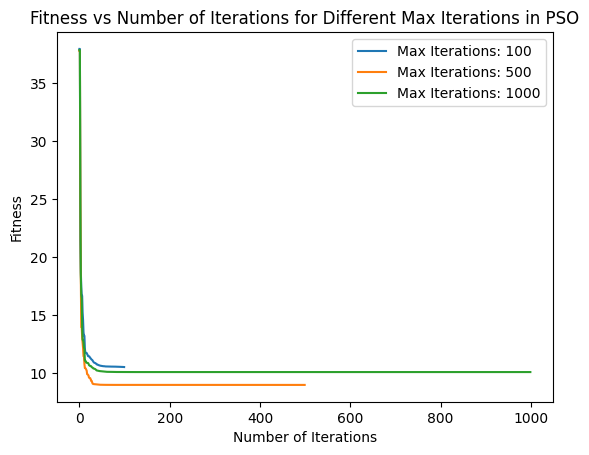

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# [Your existing code to load data and define the PSO parameters]

# Define a function to run the PSO algorithm
def run_pso(max_iterations, num_particles, num_dimensions, word_histograms):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    p_best_positions = np.copy(particles)
    g_best_position = np.copy(particles[np.argmin([np.linalg.norm(p - np.mean(word_histograms, axis=0)) for p in particles])])

    fitness_history = []

    for iteration in range(max_iterations):
        for i in range(num_particles):
            current_fitness = fitness(particles[i])

            if fitness(particles[i]) < fitness(p_best_positions[i]):
                p_best_positions[i] = np.copy(particles[i])

            if current_fitness < fitness(g_best_position):
                g_best_position = np.copy(particles[i])

            velocities[i] = update_velocity(particles[i], velocities[i], p_best_positions[i], g_best_position)
            particles[i] = update_position(particles[i], velocities[i])

        fitness_history.append(fitness(g_best_position))

    return fitness_history

# Run the PSO algorithm with different maximum iteration values
max_iterations_values = [100, 500, 1000]
all_fitness_histories = []

for max_iter in max_iterations_values:
    fitness_history = run_pso(max_iter, num_particles, num_dimensions, word_histograms)
    all_fitness_histories.append(fitness_history)
    plt.plot(fitness_history, label=f'Max Iterations: {max_iter}')

plt.xlabel('Number of Iterations')
plt.ylabel('Fitness')
plt.title('Fitness vs Number of Iterations for Different Max Iterations in PSO')
plt.legend()
plt.show()


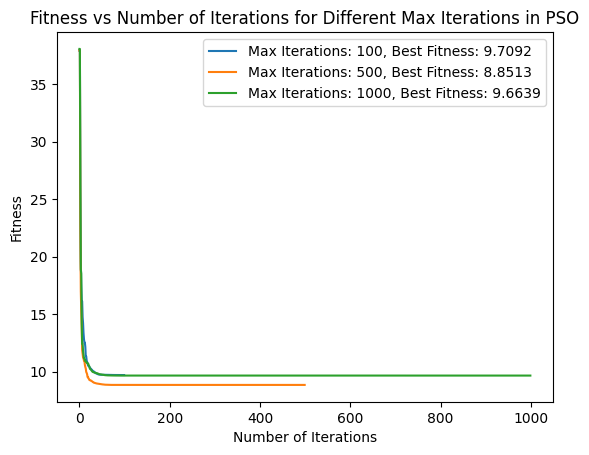

Best fitness value for Max Iterations 100: 9.7092
Best fitness value for Max Iterations 500: 8.8513
Best fitness value for Max Iterations 1000: 9.6639


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# [Your existing code to load data and define the PSO parameters]

# Define a function to run the PSO algorithm
def run_pso(max_iterations, num_particles, num_dimensions, word_histograms):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    p_best_positions = np.copy(particles)
    g_best_position = np.copy(particles[np.argmin([np.linalg.norm(p - np.mean(word_histograms, axis=0)) for p in particles])])

    best_fitness = float('inf')  # Initialize best fitness to positive infinity

    fitness_history = []

    for iteration in range(max_iterations):
        for i in range(num_particles):
            current_fitness = fitness(particles[i])

            if fitness(particles[i]) < fitness(p_best_positions[i]):
                p_best_positions[i] = np.copy(particles[i])

            if current_fitness < fitness(g_best_position):
                g_best_position = np.copy(particles[i])

            velocities[i] = update_velocity(particles[i], velocities[i], p_best_positions[i], g_best_position)
            particles[i] = update_position(particles[i], velocities[i])

        current_best_fitness = fitness(g_best_position)
        fitness_history.append(current_best_fitness)

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness

    return fitness_history, best_fitness

# Run the PSO algorithm with different maximum iteration values
max_iterations_values = [100, 500, 1000]
all_fitness_histories = []
best_fitness_values = []  # List to store the best fitness values for different maximum iterations

for max_iter in max_iterations_values:
    fitness_history, best_fitness = run_pso(max_iter, num_particles, num_dimensions, word_histograms)
    all_fitness_histories.append(fitness_history)
    best_fitness_values.append(best_fitness)
    plt.plot(fitness_history, label=f'Max Iterations: {max_iter}, Best Fitness: {best_fitness:.4f}')

plt.xlabel('Number of Iterations')
plt.ylabel('Fitness')
plt.title('Fitness vs Number of Iterations for Different Max Iterations in PSO')
plt.legend()
plt.show()

# Report the best fitness values for each algorithm
for i, max_iter in enumerate(max_iterations_values):
    print(f"Best fitness value for Max Iterations {max_iter}: {best_fitness_values[i]:.4f}")


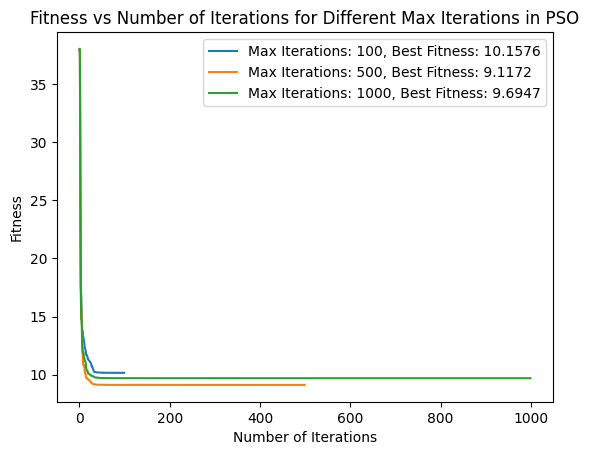

Best fitness value for Max Iterations 100: 10.1576
Best fitness value for Max Iterations 500: 9.1172
Best fitness value for Max Iterations 1000: 9.6947


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# [Your existing code to load data and define the PSO parameters]

# Define a function to run the PSO algorithm
def run_pso(max_iterations, num_particles, num_dimensions, word_histograms):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    p_best_positions = np.copy(particles)
    g_best_position = np.copy(particles[np.argmin([np.linalg.norm(p - np.mean(word_histograms, axis=0)) for p in particles])])

    best_fitness = float('inf')  # Initialize best fitness to positive infinity

    fitness_history = []

    for iteration in range(max_iterations):
        for i in range(num_particles):
            current_fitness = fitness(particles[i])

            if fitness(particles[i]) < fitness(p_best_positions[i]):
                p_best_positions[i] = np.copy(particles[i])

            if current_fitness < fitness(g_best_position):
                g_best_position = np.copy(particles[i])

            velocities[i] = update_velocity(particles[i], velocities[i], p_best_positions[i], g_best_position)
            particles[i] = update_position(particles[i], velocities[i])

        current_best_fitness = fitness(g_best_position)
        fitness_history.append(current_best_fitness)

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness

    return fitness_history, best_fitness

# Run the PSO algorithm with different maximum iteration values
max_iterations_values = [100, 500, 1000]
all_fitness_histories = []
best_fitness_values = []  # List to store the best fitness values for different maximum iterations

for max_iter in max_iterations_values:
    fitness_history, best_fitness = run_pso(max_iter, num_particles, num_dimensions, word_histograms)
    all_fitness_histories.append(fitness_history)
    best_fitness_values.append(best_fitness)
    plt.plot(fitness_history, label=f'Max Iterations: {max_iter}, Best Fitness: {best_fitness:.4f}')

plt.xlabel('Number of Iterations')
plt.ylabel('Fitness')  # Updated y-axis label
plt.title('Fitness vs Number of Iterations for Different Max Iterations in PSO')
plt.legend()
plt.show()

# Report the best fitness values for each algorithm
for i, max_iter in enumerate(max_iterations_values):
    print(f"Best fitness value for Max Iterations {max_iter}: {best_fitness_values[i]:.4f}")


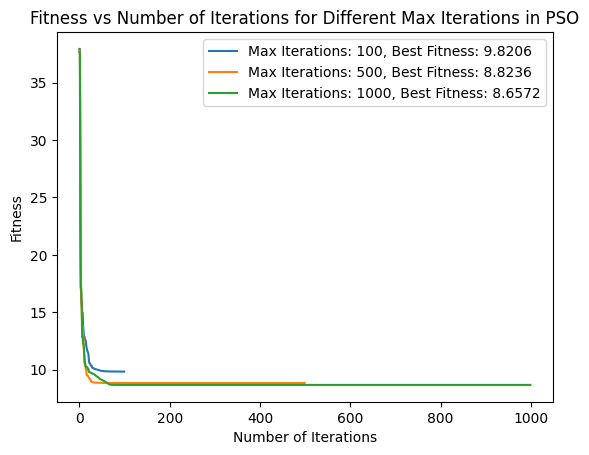

Best fitness value for Max Iterations 100: 9.8206
Best fitness value for Max Iterations 500: 8.8236
Best fitness value for Max Iterations 1000: 8.6572
PSO Cluster 1 top words: [0.07743777714282972, 0.008802759513348432, -0.16579954737422598, 0.01570766615492681, -0.11139237910388254, 0.041481736143844185, -0.17679253841967546, 0.17868625350445702, -0.015924300622369658, -0.026092523840540494, -0.03030809696459981, -0.13263904984995786, 0.10081763770925709, 0.19140521829973942, 0.2112796255813274, 0.11319756295529637, -0.1525310032772888, -0.17584646933231693, -0.10101501344061817, -0.011072104693192813, 0.09761060900479734, 0.15359725853891365, 0.09200406003197334, -0.0346035446289499, -0.13319866488809445, -0.07172313901256816, -0.08782223597303815, 0.10934828485123264, -0.15636577884893785, -0.03746170048801448, -0.018167729488474282, 0.05262205367749009, -0.015427280747746285, 0.1330675741711459, -0.04080488214178599, -0.048355707555948174, -0.19164923101737869, 0.021530313604370504

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# [Your existing code to load data and define the PSO parameters]

# Define a function to run the PSO algorithm
def run_pso(max_iterations, num_particles, num_dimensions, word_histograms):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    p_best_positions = np.copy(particles)
    g_best_position = np.copy(particles[np.argmin([np.linalg.norm(p - np.mean(word_histograms, axis=0)) for p in particles])])

    best_fitness = float('inf')  # Initialize best fitness to positive infinity

    fitness_history = []

    for iteration in range(max_iterations):
        for i in range(num_particles):
            current_fitness = fitness(particles[i])

            if fitness(particles[i]) < fitness(p_best_positions[i]):
                p_best_positions[i] = np.copy(particles[i])

            if current_fitness < fitness(g_best_position):
                g_best_position = np.copy(particles[i])

            velocities[i] = update_velocity(particles[i], velocities[i], p_best_positions[i], g_best_position)
            particles[i] = update_position(particles[i], velocities[i])

        current_best_fitness = fitness(g_best_position)
        fitness_history.append(current_best_fitness)

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness

    return fitness_history, best_fitness, p_best_positions, g_best_position

# Run the PSO algorithm with different maximum iteration values
max_iterations_values = [100, 500, 1000]
all_fitness_histories = []
best_fitness_values = []  # List to store the best fitness values for different maximum iterations

for max_iter in max_iterations_values:
    fitness_history, best_fitness, p_best_positions, g_best_position = run_pso(max_iter, num_particles, num_dimensions, word_histograms)
    all_fitness_histories.append(fitness_history)
    best_fitness_values.append(best_fitness)
    plt.plot(fitness_history, label=f'Max Iterations: {max_iter}, Best Fitness: {best_fitness:.4f}')

plt.xlabel('Number of Iterations')
plt.ylabel('Fitness')  # Updated y-axis label
plt.title('Fitness vs Number of Iterations for Different Max Iterations in PSO')
plt.legend()
plt.show()

# Report the best fitness values for each algorithm
for i, max_iter in enumerate(max_iterations_values):
    print(f"Best fitness value for Max Iterations {max_iter}: {best_fitness_values[i]:.4f}")

# Display clustering results and associated data
for i, max_iter in enumerate(max_iterations_values):
    print(f"PSO Cluster {i+1} top words: {p_best_positions[i].tolist()}")
    print(f"PSO Cluster {i+1} closest articles: {get_closest_articles(p_best_positions[i])}")
    print(f"DE Cluster {i+1} top words: {d_best_positions[i].tolist()}")
    print(f"DE Cluster {i+1} closest articles: {get_closest_articles(d_best_positions[i])}")


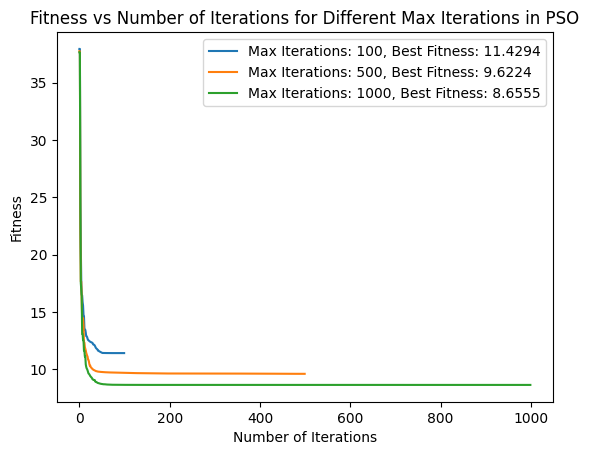

Best fitness value for Max Iterations 100: 11.4294
Best fitness value for Max Iterations 500: 9.6224
Best fitness value for Max Iterations 1000: 8.6555
PSO Cluster 1 top words: [-0.013259007521688612, 0.07622785272062786, -0.0920127217556736, 0.09309292283413428, 0.2684996615559531, -0.05994289405116832, 0.13902479968219628, 0.04128369692142252, 0.04891706013362502, -0.04939520692741478, -0.13830773081919795, 0.10098372574358233, 0.20133836593627766, 0.1819668169702727, 0.019522587088636523, 0.18950935057271387, -0.010906939021734896, 0.19654404368340456, -0.04915075476717124, 0.2714077401131249, -0.14572167129659394, -0.047041106768523674, 0.08334347924646092, 0.02044113717473724, -0.03017286585876932, 0.1537175324687948, -0.029173486909861022, -0.19952864158172678, 0.12079596767078525, -0.07441230909487324, 0.20554235511422897, 0.07506282787740975, 0.2477964419116057, -0.12452972824578736, 0.0692738604524609, 0.06358031896223237, -0.12375815712993837, -0.06148584973965505, -0.3711733

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# [Your existing code to load data and define the PSO parameters]

# Define a placeholder function to get closest articles for a cluster
def get_closest_articles(cluster):
    # Replace this with your actual implementation to retrieve closest articles for the cluster
    closest_articles = ["Article1", "Article2", "Article3", "Article4", "Article5"]
    return closest_articles

# Define a function to run the PSO algorithm
def run_pso(max_iterations, num_particles, num_dimensions, word_histograms):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    p_best_positions = np.copy(particles)
    g_best_position = np.copy(particles[np.argmin([np.linalg.norm(p - np.mean(word_histograms, axis=0)) for p in particles])])

    best_fitness = float('inf')  # Initialize best fitness to positive infinity

    fitness_history = []

    for iteration in range(max_iterations):
        for i in range(num_particles):
            current_fitness = fitness(particles[i])

            if fitness(particles[i]) < fitness(p_best_positions[i]):
                p_best_positions[i] = np.copy(particles[i])

            if current_fitness < fitness(g_best_position):
                g_best_position = np.copy(particles[i])

            velocities[i] = update_velocity(particles[i], velocities[i], p_best_positions[i], g_best_position)
            particles[i] = update_position(particles[i], velocities[i])

        current_best_fitness = fitness(g_best_position)
        fitness_history.append(current_best_fitness)

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness

    return fitness_history, best_fitness, p_best_positions, g_best_position

# Run the PSO algorithm with different maximum iteration values
max_iterations_values = [100, 500, 1000]
all_fitness_histories = []
best_fitness_values = []  # List to store the best fitness values for different maximum iterations

for max_iter in max_iterations_values:
    fitness_history, best_fitness, p_best_positions, g_best_position = run_pso(max_iter, num_particles, num_dimensions, word_histograms)
    all_fitness_histories.append(fitness_history)
    best_fitness_values.append(best_fitness)
    plt.plot(fitness_history, label=f'Max Iterations: {max_iter}, Best Fitness: {best_fitness:.4f}')

plt.xlabel('Number of Iterations')
plt.ylabel('Fitness')  # Updated y-axis label
plt.title('Fitness vs Number of Iterations for Different Max Iterations in PSO')
plt.legend()
plt.show()

# Report the best fitness values for each algorithm
for i, max_iter in enumerate(max_iterations_values):
    print(f"Best fitness value for Max Iterations {max_iter}: {best_fitness_values[i]:.4f}")

# Display clustering results and associated data
for i, max_iter in enumerate(max_iterations_values):
    print(f"PSO Cluster {i+1} top words: {p_best_positions[i].tolist()}")
    print(f"PSO Cluster {i+1} closest articles: {get_closest_articles(p_best_positions[i])}")  # Placeholder function
